# Non-proliferative diabetic retinopathy

Non-proliferative diabetic retinopathy (NPDR) is the early stage of the disease in which symptoms will be mild or nonexistent. In NPDR, the blood vessels in the retina are weakened. Tiny bulges in the blood vessels, called microaneurysms, may leak fluid into the retina. This leakage may lead to swelling of the macula.

# Proliferative diabetic retinopathy

Proliferative diabetic retinopathy (PDR) is the more advanced form of the disease. At this stage, circulation problems deprive the retina of oxygen. new, fragile blood vessels begin to grow in the retina and into the vitreous, the gel-like fluid that fills the back of the eye. The new blood vessels may leak blood into the vitreous, clouding vision.


# Importing

In [1]:
import os
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
import tensorflow as tf
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from PIL import Image
from PIL import UnidentifiedImageError

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
import itertools

import warnings
warnings.filterwarnings('ignore')

In [2]:
Healthy = os.listdir(r"C:\Users\Mouli\Desktop\Desktop\Healthy\")
Mild = os.listdir(r"C:\Users\Mouli\Desktop\Desktop\Mild DR\")
Moderate = os.listdir(r"C:\Users\Mouli\Desktop\Desktop\Moderate DR\")
Proliferate = os.listdir(r"C:\Users\Mouli\Desktop\Desktop\Proliferate DR\")
Severe = os.listdir(r"C:\Users\Mouli\Desktop\Desktop\Severe DR\")

# Data Preprocessing and classify into 3 classes

In [3]:
img_w, img_h = 225, 225
X = []
y = []

In [4]:
for i in Healthy:
    try:
        img = Image.open(r"C:\Users\Mouli\Desktop\Desktop\Healthy\" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(0)
    except UnidentifiedImageError:
        pass

In [5]:
for i in Mild:
    try:
        img = Image.open(r"C:\Users\Mouli\Desktop\Desktop\Mild DR\" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass

In [6]:
for i in Moderate:
    try:
        img = Image.open(r"C:\Users\Mouli\Desktop\Desktop\Moderate DR\" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass

In [7]:
for i in Proliferate:
    try:
        img = Image.open(r"C:\Users\Mouli\Desktop\Desktop\Proliferate DR\" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(2)
    except UnidentifiedImageError:
        pass

In [8]:
for i in Severe:
    try:
        img = Image.open(r"C:\Users\Mouli\Desktop\Desktop\Severe DR\" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(2)
    except UnidentifiedImageError:
        pass

In [9]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

(2750, 225, 225, 3) (2750,)


In [10]:
x = X.astype('float32')
x /= 255

In [11]:
num_classes = 3

labels = keras.utils.to_categorical(y, num_classes)
print(labels[0])

[1. 0. 0.]


# Data split to train, validation and test

In [12]:
x_train1, x_test, y_train1, y_test = train_test_split(x, labels, test_size = 0.1, random_state=5)
x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1,test_size=0.1,random_state=5)

print('Number of train: {}'.format(len(x_train)))
print('Number of validation: {}'.format(len(x_val)))
print('Number of test: {}'.format(len(x_test)))

Number of train: 2227
Number of validation: 248
Number of test: 275


# Data Augmentation

In [13]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=20.,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=30.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=0.2,
    vertical_flip=0.2,
    rescale=None)

datagen.fit(x_train)

# Modeling

In [14]:
base_model = tf.keras.applications.InceptionV3(input_shape=(225,225,3),include_top=False,weights="imagenet")

2022-05-07 00:03:30.872615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-07 00:03:30.959376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-07 00:03:30.960200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-07 00:03:30.961369: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 3s 0us/step


In [15]:
for layer in base_model.layers[:-10]:
    layer.trainable=False

In [16]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6553728   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 28,373,411
Trainable params: 6,570,819
Non-trainable params: 21,802,592
____________________________________

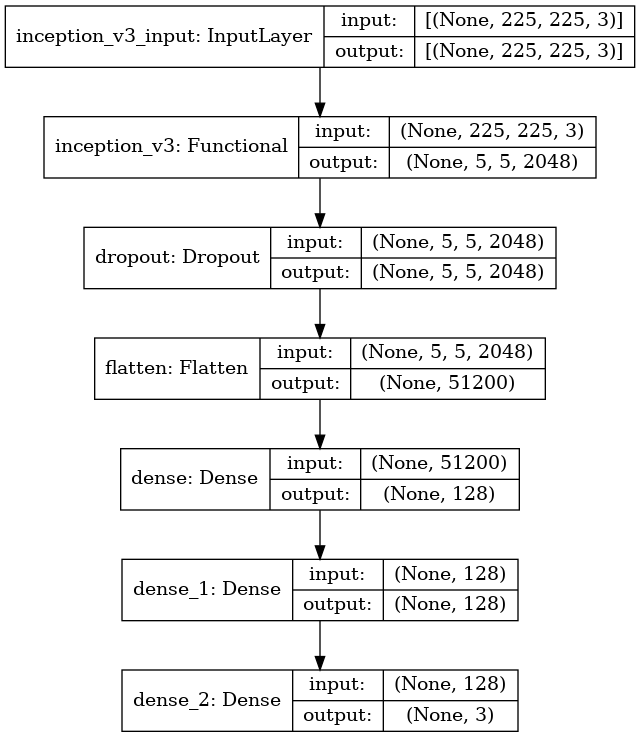

In [17]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [18]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 3*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [19]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [20]:
lrd = ReduceLROnPlateau(monitor = 'recall',patience = 10,verbose = 1,factor = 0.50, min_lr = 1e-6)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=1, patience=10)

In [21]:
model.compile(optimizer='Adam', loss = tf.keras.losses.CategoricalCrossentropy(),metrics=METRICS)

# Training

In [22]:
%time
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 20,verbose = 1,callbacks=[lrd,mcp,es])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


2022-05-07 00:03:41.323445: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1352902500 exceeds 10% of free system memory.
2022-05-07 00:03:42.748376: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1352902500 exceeds 10% of free system memory.
2022-05-07 00:03:43.781598: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-05-07 00:03:49.157520: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


70/70 [==============================] - 18s 101ms/step - loss: 2.0189 - accuracy: 0.6821 - precision: 0.6868 - recall: 0.6794 - auc: 0.8469 - f1_score: 1.0231 - val_loss: 0.5611 - val_accuracy: 0.7863 - val_precision: 0.7878 - val_recall: 0.7782 - val_auc: 0.9242 - val_f1_score: 1.1784
Epoch 2/20
70/70 [==============================] - 4s 61ms/step - loss: 0.4494 - accuracy: 0.8154 - precision: 0.8183 - recall: 0.8128 - auc: 0.9462 - f1_score: 1.2234 - val_loss: 0.6121 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.9148 - val_f1_score: 1.1270
Epoch 3/20
70/70 [==============================] - 4s 64ms/step - loss: 0.4757 - accuracy: 0.8096 - precision: 0.8119 - recall: 0.8083 - auc: 0.9465 - f1_score: 1.2152 - val_loss: 0.6903 - val_accuracy: 0.7218 - val_precision: 0.7218 - val_recall: 0.7218 - val_auc: 0.9047 - val_f1_score: 1.0840
Epoch 4/20
70/70 [==============================] - 4s 59ms/step - loss: 0.2735 - accuracy: 0.8904 - precision: 0.8916

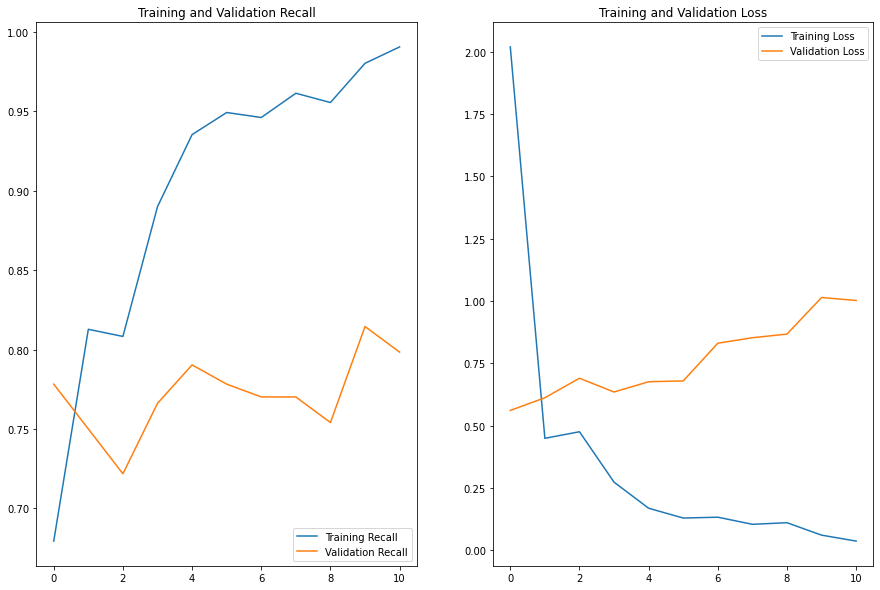

In [23]:
acc = history.history['recall']
val_acc = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.history['val_loss']))
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Recall')
plt.plot(epochs_range, val_acc, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction

In [24]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Classification Report
              precision    recall  f1-score   support

      Healty       0.90      0.97      0.93        95
     Caution       0.78      0.81      0.80       129
      Severe       0.62      0.47      0.53        51

    accuracy                           0.80       275
   macro avg       0.77      0.75      0.76       275
weighted avg       0.79      0.80      0.80       275



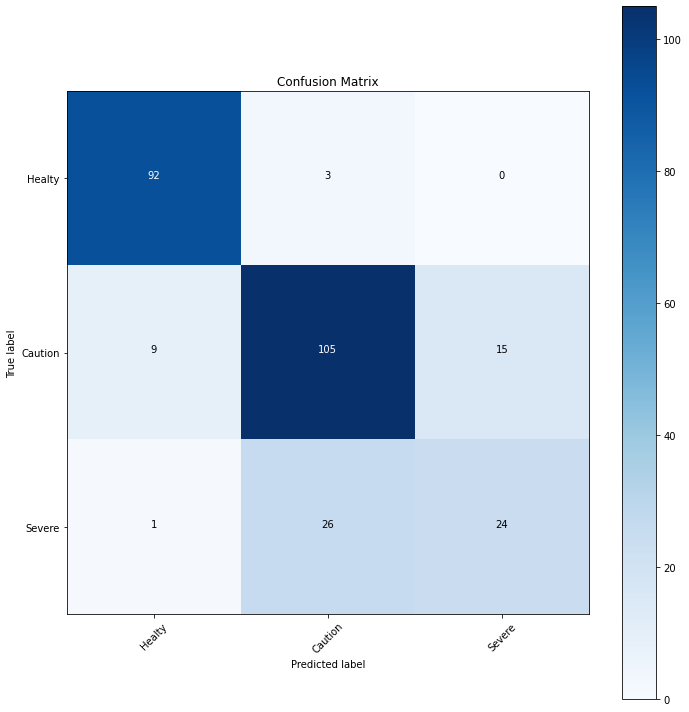

In [25]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

y_test_c = np.argmax(y_test, axis=1)
target_names = ["Healty", "Caution", "Severe"]

Y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_c, Y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(y_test_c, Y_pred, target_names=target_names))

# Conclution

As first step, we have to reduce the missed 'Caution' and 'Severe' by this model. In practical, when we get the result 'Caution' or 'Severe', we should examine them again carefully. But we can reduce time and cost by screening　with this kind of model.